# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


**Общая информация**

**Срок сдачи:** 25 апреля 18:00 Сдача **очная** на онлайн занятии.


Используйте данный Ipython Notebook при оформлении домашнего задания.

Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0422, Задание 2] Фамилия Имя.



**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - \alpha\sum_{i=1}^{n}(x_i \cdot w_{old} - y_i)x_i  - \frac{2w_{old}}{СN}$$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

***Ваше решение здесь***
Если старый вес слишком большой то его умножение на признак будет больше целевого значения и вес уменьшиться и наоборот (интуиция для внутреннего содержимого скобок), чем больше параметр тем сильнее его вклад в изначальное произведение и вес должен изменяться сильнее

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - \alpha \sum^n_{i=1}(y_i -\sigma(w_{old}\cdot x_i))x_i -\frac{2w_{old}}{CN} $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

***Ваше решение здесь***

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

***Ваше решение здесь***

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

***Ваше решение здесь***

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

***Ваше решение здесь***

#  Реализация линейной модели (4 балла)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [1]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [3]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [4]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [128]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [2]:
import random
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    
    X_batch = np.array([])
    y_batch = np.array([])
    used_sample = set()
    Xy = np.vstack((y, X.T))
    np.random.shuffle((Xy.T))
    X_loc = Xy[1:, ].T
    y_loc = Xy[0, ]
    probe = random.randint(0, y.shape[0])
    for i in range(y.shape[0] // batch_size):
        X_batch = np.array(X_loc[i*batch_size:i*batch_size+batch_size, :])
        y_batch = np.array(y_loc[i*batch_size:i*batch_size+batch_size])
        yield (X_batch, y_batch)

# Теперь можно сделать генератор по данным ()
#  my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):

In [319]:
#%%pycodestyle

def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    sigm_value_x = 1 / (1 + np.exp((-1) * x))
    ## Your code Here
    return sigm_value_x


from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=10, model_type='lin_reg'):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type
        self.th = 0.5 #for log reg
        
        
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        N = y_batch.shape[0] if len(y_batch.shape) > 0 else 1
        if self.model_type == 'lin_reg':
            y_pred = (X_batch @ self.weights) + self.b
            loss = 1/(N) * np.sum(np.square(y_pred - y_batch))
        else:
            a = X_batch @ self.weights
            sgm_a = sigmoid(a + self.b)
            r_part_sgm = np.log(1-(sgm_a))
            np.nan_to_num(r_part_sgm, copy = False, nan = -np.inf)
            r_part = (1-y_batch) * r_part_sgm
            l_part = y_batch * np.log(sgm_a)
            loss = -1/(N) * np.sum(l_part + r_part)
        return loss
    
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        if self.model_type == 'lin_reg':
            y_pred = (X_batch @ self.weights) + self.b
            loss_grad = (y_pred - y_batch) @ X_batch
            self.b = self.b - self.alpha * np.mean(y_pred - y_batch)
            
        else:
            a = X_batch @ (self.weights)
            y_pred = sigmoid(a + self.b)
            loss_grad = (y_pred - y_batch) @  X_batch
        
        loss_grad = loss_grad / X_batch.shape[1]
        loss_grad = self.alpha * loss_grad
        self.b = self.b - self.alpha * np.mean(y_pred - y_batch)
        
        
        return loss_grad
    
    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights = self.weights - new_grad - (2 * self.weights /(self.C * self.weights.shape[0]))
        
        pass
    
    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        
        # Нужно инициализровать случайно веса
        try:
            self.weights = np.ones(X.shape[1])
        except IndexError:
            self.weights = np.ones(1)
        self.b = 0
        n = 0
        while n < self.max_epoch: 
            """
            new_epoch_generator = self.batch_generator(X, y, batch_size = 5)
            """
            new_epoch_generator = batch_generator(X, y, self.batch_generator)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)
                # Подумайте в каком месте стоит посчитать ошибку для отладки модели
                # До градиентного шага или после
                batch_loss = self.calc_loss(X_batch, y_batch) #После чтобы знать последнее значение последнего шага
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
                if n >= self.max_epoch:
                    break
                n += 1
            """
            batch_grad = self.calc_loss_grad(X, y)
            self.update_weights(batch_grad)
                # Подумайте в каком месте стоит посчитать ошибку для отладки модели
                # До градиентного шага или после
                # batch_loss = self.calc_loss(X_batch, y_batch)
            batch_loss = self.calc_loss(X, y) #После чтобы знать последнее значение последнего шага
            self.errors_log['iter'].append(n)
            self.errors_log['loss'].append(batch_loss)
            """      
        return self
        
    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        if self.model_type == 'lin_reg':
            if self.weights.shape == (1,):
                X = X[:,np.newaxis]
            y_hat = (X @ self.weights) + self.b
        else:
            a = X @ self.weights
            pos = sigmoid(a + self.b)
            id_x = (pos >= self.th)
            pos[id_x] = 1
            pos[~ id_x] = 0
            y_hat = pos
        # Желательно здесь использовать матричные операции между X и весами, например, numpy.dot 
        return y_hat

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [142]:
def plot_decision_boundary(clf):
    ## Your code Here
    x = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 30)
    y = np.linspace(np.min(X[:,1]), np.max(X[:,1]), 30)
    X_, Y_ = np.meshgrid(x, y)

    xy = np.vstack([X_.ravel(), Y_.ravel()]).T
    P = clf.predict(xy)
    P = P.reshape(X_.shape)
    print(clf.weights)

    plt.contour(X_, Y_, P, colors='b',
                levels=[-1, 0, 1], alpha=0.5)

[ 3.88020764 -4.43976023]


C:\Users\User\AppData\Local\Temp/ipykernel_29588/2935357030.py:15: UserWarning: No contour levels were found within the data range.
  plt.contour(X_, Y_, P, colors='b',


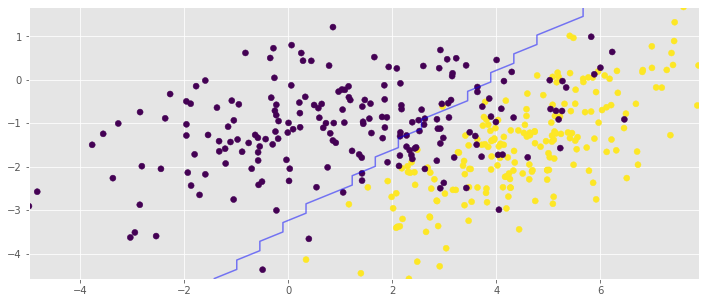

In [352]:
np.random.seed(0)
from sklearn.linear_model import LogisticRegression

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

# plot_decision_boundary(your_model)
'''
my part
'''
b_gen = 10
my_model = MySGDClassifier(b_gen, max_epoch = 1000, alpha=1, C = 10000, model_type='log_reg')
my_model.fit(X,y)
plot_decision_boundary(my_model)

plt.scatter(X[:,0], X[:,1], c=y)

[1.]
100max Epoch


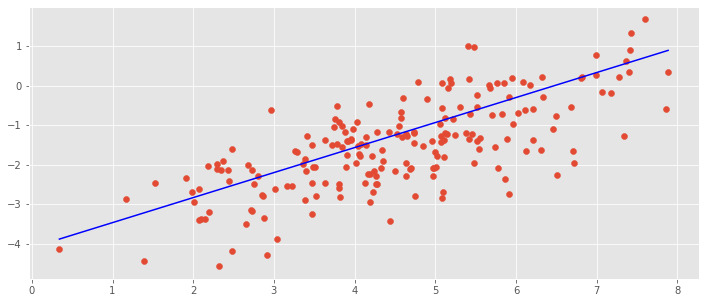

In [211]:
## checking how good is linear regression
X_lin = gauss1[:,0]
y_lin = gauss1[:,1]

my_model = MySGDClassifier(b_gen, max_epoch = 100, alpha=0.01, C = 10000000000000000, model_type='lin_reg')
my_model.fit(X_lin,y_lin)
X_test = np.linspace(X_lin.min(), X_lin.max(), 20)
y_test = my_model.predict(X_test)
print my_model.weights

plt.plot(X_test, y_test, 'b')

plt.scatter(X_lin, y_lin)

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [10]:
from sklearn.datasets import make_classification

In [11]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

2
1.0
0.5
0.25
0.125


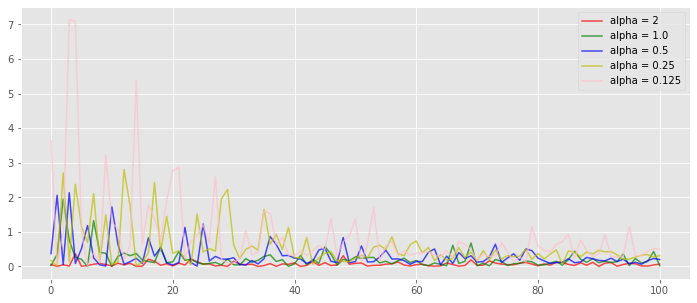

In [53]:
## Your Code Here
b_gen = 1000
initial_alpha = 2
for color in ['r','g','b','y', 'pink']:
    my_model = MySGDClassifier(b_gen, max_epoch = 100, alpha=initial_alpha, C = 10, model_type='log_reg')
    my_model.fit(X,y)
    iter_step = range(len(my_model.errors_log['iter']))
    error = my_model.errors_log['loss']
    plt.plot(iter_step, error, color = color, alpha = 0.7, label = f"alpha = {initial_alpha}")
    plt.legend()
    print(initial_alpha)
    initial_alpha /= 2

0.1
0.01
0.001
0.0001
1e-05


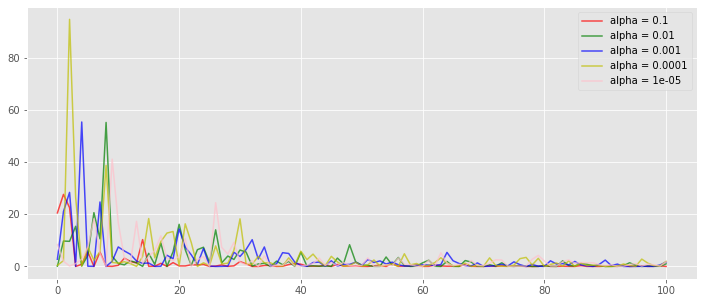

In [55]:
b_gen = 1000
initial_alpha = 0.1
for color in ['r','g','b','y', 'pink']:
    my_model = MySGDClassifier(b_gen, max_epoch = 100, alpha=initial_alpha, C = 10, model_type='lin_reg')
    my_model.fit(X,y)
    iter_step = range(len(my_model.errors_log['iter']))
    error = my_model.errors_log['loss']
    plt.plot(iter_step, error, color = color, alpha = 0.7, label = f"alpha = {initial_alpha}")
    plt.legend()
    print(initial_alpha)
    initial_alpha /= 10

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

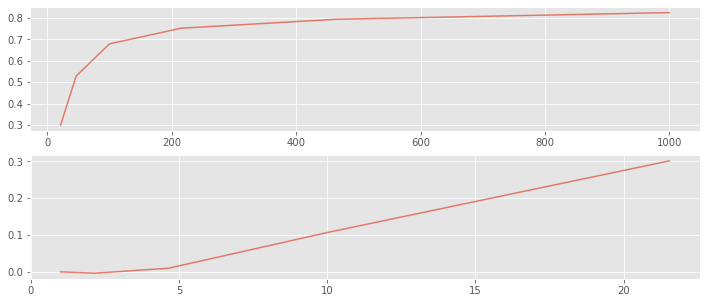

In [67]:
## Your Code Here
b_gen = 1000
C_vars = np.logspace(3, 0, 10)
avg_weights = []
for C in C_vars:
    my_model = MySGDClassifier(b_gen, max_epoch = 100, alpha= 0.1, C = C, model_type='log_reg')
    my_model.fit(X,y)
    avg_weights.append(my_model.weights.mean())
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.plot(C_vars[:6], avg_weights[:6], alpha = 0.7)
ax2.plot(C_vars[5:], avg_weights[5:], alpha = 0.7)

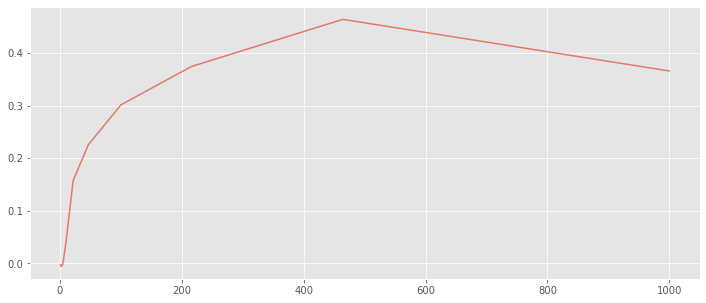

In [69]:
## Your Code Here
b_gen = 1000
C_vars = np.logspace(3, 0, 10)
avg_weights = []
for C in C_vars:
    my_model = MySGDClassifier(b_gen, max_epoch = 100, alpha= 0.1, C = C, model_type='lin_reg')
    my_model.fit(X,y)
    avg_weights.append(my_model.weights.mean())
fig = plt.figure()
ax1 = fig.add_subplot()
ax1.plot(C_vars, avg_weights, alpha = 0.7)

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

# Боевое применение (4  балла)

**Защита данной части возможна только при преодолении в проекте бейзлайна Handmade baseline.**

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [122]:
doc_to_title = {}
with open('docs_titles.tsv', encoding = 'utf-8') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))

28026


In [123]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [124]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15])
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


In [127]:
np.unique(y_train)

array([0, 1], dtype=int64)

In [76]:
groups_train[groups_train == 4].shape

(88,)

Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [11]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X_train)
b_gen = 5000
my_model = MySGDClassifier(b_gen, max_epoch = 100000, alpha= 0.1, C = 100, model_type='log_reg')
my_model.fit(scaled_X, y_train)
print(my_model.weights)

C:\Users\User\AppData\Local\Temp/ipykernel_29296/2040586900.py:51: RuntimeWarning: divide by zero encountered in log
  r_part_sgm = np.log(1-(sgm_a))


[0.04175007 0.08539352 0.07801683 0.05618774 0.09033858 0.07331478
 0.08755365 0.08414006 0.08866702 0.08033942 0.07871216 0.08039753
 0.06923081 0.0842244  0.10853481]


Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [8]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

In [241]:
kf = KFold(n_splits=4)
kf.get_n_splits(scaled_X)
b_gen = 10000
f1_scores = np.array([])
alphas = np.array([1, 0.5 ,0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001])
for alph in alphas:
    f1_split = np.array([])
    for train_index, test_index in kf.split(scaled_X):
        X_train_fold, X_test_fold = scaled_X[train_index], scaled_X[test_index]
        y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
        my_model = MySGDClassifier(b_gen, max_epoch = 100000, alpha= alph, C = 100, model_type='log_reg')
        my_model.fit(X_train_fold, y_train_fold)
        prediction = my_model.predict(X_test_fold)
        f1 = f1_score(y_test_fold, prediction)
        f1_split = np.append(f1_split, f1)
    f1_scores = np.append(f1_scores, f1_split.mean())



C:\Users\User\AppData\Local\Temp/ipykernel_29296/2040586900.py:51: RuntimeWarning: divide by zero encountered in log
  r_part_sgm = np.log(1-(sgm_a))
C:\Users\User\AppData\Local\Temp/ipykernel_29296/2040586900.py:51: RuntimeWarning: divide by zero encountered in log
  r_part_sgm = np.log(1-(sgm_a))
C:\Users\User\AppData\Local\Temp/ipykernel_29296/2040586900.py:51: RuntimeWarning: divide by zero encountered in log
  r_part_sgm = np.log(1-(sgm_a))
C:\Users\User\AppData\Local\Temp/ipykernel_29296/2040586900.py:51: RuntimeWarning: divide by zero encountered in log
  r_part_sgm = np.log(1-(sgm_a))
C:\Users\User\AppData\Local\Temp/ipykernel_29296/2040586900.py:51: RuntimeWarning: divide by zero encountered in log
  r_part_sgm = np.log(1-(sgm_a))
C:\Users\User\AppData\Local\Temp/ipykernel_29296/2040586900.py:51: RuntimeWarning: divide by zero encountered in log
  r_part_sgm = np.log(1-(sgm_a))
C:\Users\User\AppData\Local\Temp/ipykernel_29296/2040586900.py:51: RuntimeWarning: divide by zero en

"\nplt.annotate('min', xy=(0.6, 0.35),\n            xytext=(0.6, 0.40), textcoords='data',\n            arrowprops=dict(facecolor='g'))\n"

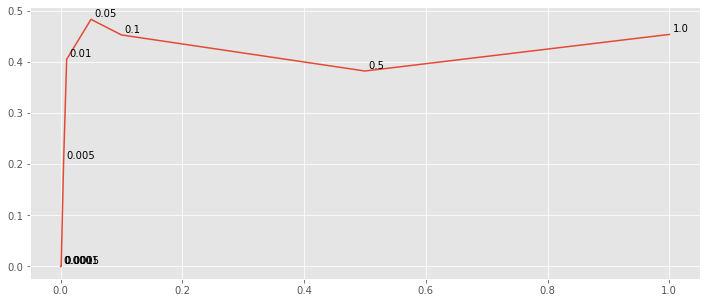

In [242]:
plt.plot(alphas, f1_scores)
for i, v in enumerate(alphas):
    plt.annotate(str(v), xy=(v, f1_scores[i]), xytext=(v + 0.005, f1_scores[i]+0.005))

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

In [244]:
kf = KFold(n_splits=4)
kf.get_n_splits(scaled_X)
b_gen = 10000
f1_scores_C = np.array([])
C_vars = np.array([10000, 1000, 100, 10, 1, 0.1, 0.01])
for C in C_vars:
    f1_split = np.array([])
    for train_index, test_index in kf.split(scaled_X):
        X_train_fold, X_test_fold = scaled_X[train_index], scaled_X[test_index]
        y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
        my_model = MySGDClassifier(b_gen, max_epoch = 100000, alpha= 0.1, C = C, model_type='log_reg')
        my_model.fit(X_train_fold, y_train_fold)
        prediction = my_model.predict(X_test_fold)
        f1 = f1_score(y_test_fold, prediction)
        f1_split = np.append(f1_split, f1)
    f1_scores_C = np.append(f1_scores_C, f1_split.mean())


C:\Users\User\AppData\Local\Temp/ipykernel_29296/2040586900.py:51: RuntimeWarning: divide by zero encountered in log
  r_part_sgm = np.log(1-(sgm_a))
C:\Users\User\AppData\Local\Temp/ipykernel_29296/2040586900.py:51: RuntimeWarning: divide by zero encountered in log
  r_part_sgm = np.log(1-(sgm_a))
C:\Users\User\AppData\Local\Temp/ipykernel_29296/2040586900.py:51: RuntimeWarning: divide by zero encountered in log
  r_part_sgm = np.log(1-(sgm_a))
C:\Users\User\AppData\Local\Temp/ipykernel_29296/2040586900.py:51: RuntimeWarning: divide by zero encountered in log
  r_part_sgm = np.log(1-(sgm_a))
C:\Users\User\AppData\Local\Temp/ipykernel_29296/2040586900.py:51: RuntimeWarning: divide by zero encountered in log
  r_part_sgm = np.log(1-(sgm_a))
C:\Users\User\AppData\Local\Temp/ipykernel_29296/2040586900.py:51: RuntimeWarning: divide by zero encountered in log
  r_part_sgm = np.log(1-(sgm_a))
C:\Users\User\AppData\Local\Temp/ipykernel_29296/2040586900.py:51: RuntimeWarning: divide by zero en

"\nplt.annotate('min', xy=(0.6, 0.35),\n            xytext=(0.6, 0.40), textcoords='data',\n            arrowprops=dict(facecolor='g'))\n"

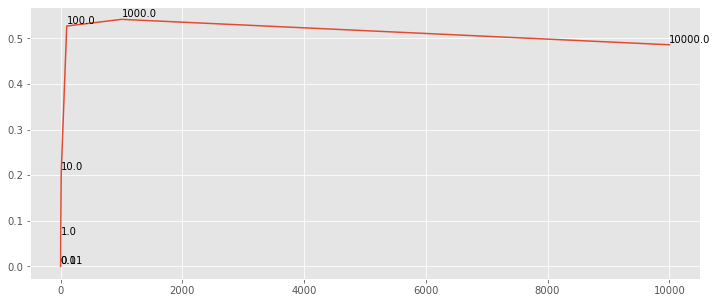

In [245]:
plt.plot(C_vars, f1_scores_C)

for i, v in enumerate(C_vars):
    plt.annotate(str(v), xy=(v, f1_scores_C[i]), xytext=(v + 0.005, f1_scores_C[i]+0.005))
"""
plt.annotate('min', xy=(0.6, 0.35),
            xytext=(0.6, 0.40), textcoords='data',
            arrowprops=dict(facecolor='g'))
"""

In [246]:
kf = KFold(n_splits=4)
kf.get_n_splits(scaled_X)
b_gen = 10000
f1_scores_th = np.array([])
threshholds = np.array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95])
for th in threshholds:
    f1_split = np.array([])
    for train_index, test_index in kf.split(scaled_X):
        X_train_fold, X_test_fold = scaled_X[train_index], scaled_X[test_index]
        y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
        my_model = MySGDClassifier(b_gen, max_epoch = 100000, alpha= 0.1, C = 1000, model_type='log_reg')
        my_model.th = th
        my_model.fit(X_train_fold, y_train_fold)
        prediction = my_model.predict(X_test_fold)
        f1 = f1_score(y_test_fold, prediction)
        f1_split = np.append(f1_split, f1)
    f1_scores_th = np.append(f1_scores_th, f1_split.mean())


C:\Users\User\AppData\Local\Temp/ipykernel_29296/2040586900.py:51: RuntimeWarning: divide by zero encountered in log
  r_part_sgm = np.log(1-(sgm_a))
C:\Users\User\AppData\Local\Temp/ipykernel_29296/2040586900.py:51: RuntimeWarning: divide by zero encountered in log
  r_part_sgm = np.log(1-(sgm_a))
C:\Users\User\AppData\Local\Temp/ipykernel_29296/2040586900.py:51: RuntimeWarning: divide by zero encountered in log
  r_part_sgm = np.log(1-(sgm_a))
C:\Users\User\AppData\Local\Temp/ipykernel_29296/2040586900.py:51: RuntimeWarning: divide by zero encountered in log
  r_part_sgm = np.log(1-(sgm_a))
C:\Users\User\AppData\Local\Temp/ipykernel_29296/2040586900.py:51: RuntimeWarning: divide by zero encountered in log
  r_part_sgm = np.log(1-(sgm_a))
C:\Users\User\AppData\Local\Temp/ipykernel_29296/2040586900.py:51: RuntimeWarning: divide by zero encountered in log
  r_part_sgm = np.log(1-(sgm_a))
C:\Users\User\AppData\Local\Temp/ipykernel_29296/2040586900.py:51: RuntimeWarning: divide by zero en

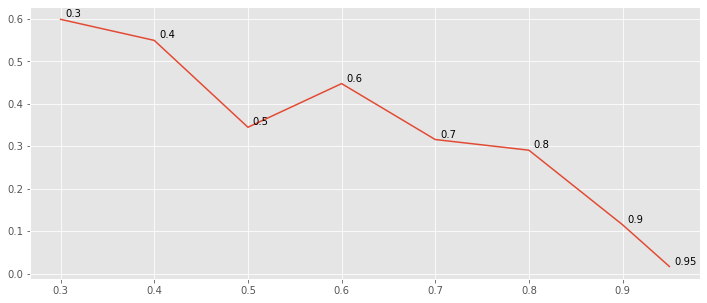

In [247]:
plt.plot(threshholds, f1_scores_th)

for i, v in enumerate(threshholds):
    plt.annotate(str(v), xy=(v, f1_scores_th[i]), xytext=(v + 0.005, f1_scores_th[i]+0.005))

In [108]:
test_data = pd.read_csv('test_groups.csv')
testgroups_titledata = {}
for i in range(len(test_data)):
    new_test_doc = test_data.iloc[i]
    doc_test_group = new_test_doc['group_id']
    doc_test_id = new_test_doc['doc_id']
    title_test = doc_to_title[doc_test_id]
    if doc_test_group not in testgroups_titledata:
        testgroups_titledata[doc_test_group] = []
    testgroups_titledata[doc_test_group].append((doc_test_id, title_test))

In [110]:
X_test = []
groups_test = []
for new_test_group in testgroups_titledata:
    docs_test = testgroups_titledata[new_test_group]
    for k, (doc_test_id, title_test) in enumerate(docs_test):
        groups_test.append(new_test_group)
        all_test_dist = []
        words_test = set(title_test.strip().split())
        for j in range(0, len(docs_test)):
            if k == j:
                continue
            docs_id_test_j, title_test_j = docs_test[j]
            words_test_j = set(title_test_j.strip().split())
            all_test_dist.append(len(words_test.intersection(words_j)))
        X_test.append(sorted(all_test_dist, reverse=True)[0:15])
X_test = np.array(X_test)
groups_test = np.array(groups_test)

In [130]:
y_train
np.unique(y_train)

array([0, 1], dtype=int64)

In [249]:
b_gen = 10000
my_model = MySGDClassifier(b_gen, max_epoch = 10000000, alpha= 0.1, C = 1000, model_type='log_reg')
my_model.th = 0.4
my_model.fit(X_train, y_train)

C:\Users\User\AppData\Local\Temp/ipykernel_29296/2040586900.py:51: RuntimeWarning: divide by zero encountered in log
  r_part_sgm = np.log(1-(sgm_a))


MySGDClassifier(C=1000, alpha=0.1, batch_generator=10000, max_epoch=10000000,
                model_type='log_reg')

In [250]:
y_pred = my_model.predict(X_test)

In [251]:
y_int = y_pred.astype('int')

In [253]:
answer = pd.DataFrame(
    {'pair_id': np.array(test_data['pair_id']),
    'target': y_int}
)

In [254]:
answer.to_csv('attempt.csv', index=False)

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук показать Ваш ник на kaggle, под которым Вы залили решение, которое побило Handmade baseline. **

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***